Deep Learning with Keras and Tensorflow

In [62]:
import numpy as np
import pandas as pd


In [63]:
df_diab=pd.read_csv('diabetes.csv')


In [64]:
df_diab.head(4)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0


In [65]:
df_diab.Outcome.unique()

array([1, 0])

In [66]:
df_diab.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [67]:
df_diab.shape

(768, 9)

In [68]:
X=df_diab.drop(['Outcome'],axis=1)
y=df_diab[['Outcome']]


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=12345)


In [71]:
X_train.shape

(614, 8)

In [72]:
X_test.shape

(154, 8)

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [75]:
import tensorflow as tf


In [76]:
from tensorflow.keras.models import Sequential

In [77]:
from tensorflow.keras.layers import Dense ,Dropout # Dense is fully connected Neural Network


In [78]:
model=Sequential()

In [79]:
X_train_scaled.shape[1]

8

In [80]:
# From Here Architecture will start for the Neural Network
# First Hidden Network
model.add(Dense(units=128,activation='relu',
                kernel_regularizer =tf.keras.regularizers.L1(),
                input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.2))

In [81]:
# Second Hidden Layer 64 nerons and Relu Activation function
model.add(Dense(units=64,activation='relu'))

# Third Hidden Layer with 32 neurons and activation function as relu
model.add(Dense(units=32,activation='relu'))

# output Layer with Sigmoid function
model.add(Dense(units=1,activation='sigmoid'))


In [82]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               1152      
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11,521
Trainable params: 11,521
Non-trainable params: 0
_________________________________________________________________


In [83]:
# Here 8 feature and 1 bias   so 9 as Feature i.e input layer neurons 
# 128 neurons for the first Hidden layer
9*128

1152

In [84]:
# dense (Dense)               (None, 128)               1152      

In [85]:
model.compile(optimizer='adam',loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
result=model.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
20/20 [==============================] - 0s 2ms/step - loss: 1.6255 - accuracy: 0.6564
Epoch 2/100
20/20 [==============================] - 0s 2ms/step - loss: 1.3963 - accuracy: 0.7085
Epoch 3/100
20/20 [==============================] - 0s 2ms/step - loss: 1.2207 - accuracy: 0.7476
Epoch 4/100
20/20 [==============================] - 0s 2ms/step - loss: 1.0803 - accuracy: 0.7606
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.9652 - accuracy: 0.7736
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.8775 - accuracy: 0.7736
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7992 - accuracy: 0.7736
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.7363 - accuracy: 0.7687
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.7704
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.6504 - accuracy: 0.7671
Epoch 11/

In [87]:
# Here 20 /20  is  giving as batch of the data set 
y_train_pred=model.predict(X_train_scaled)
y_test_pred=model.predict(X_test_scaled)

In [88]:
# Xtrain.shape[0]  is 614   which will divide into 20 batches 
614/32

19.1875

In [89]:
# So 20 /20 Batches are providing by the model


In [90]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [91]:
confusion_matrix(y_pred=y_train_pred>0.5,y_true=y_train)

array([[345,  49],
       [ 73, 147]])

In [92]:
accuracy_score(y_pred=y_train_pred>0.5,y_true=y_train)

0.8013029315960912

In [93]:
(393+219)/(395+219)  # calculated by confusion matrix 

0.996742671009772

In [94]:
history=pd.DataFrame(result.history)


In [95]:
history.head()

,loss,accuracy
0,1.625528,0.656352
1,1.396325,0.708469
2,1.220744,0.747557
3,1.080262,0.760586
4,0.965201,0.773616


In [96]:
import matplotlib.pyplot as plt
%matplotlib inline 

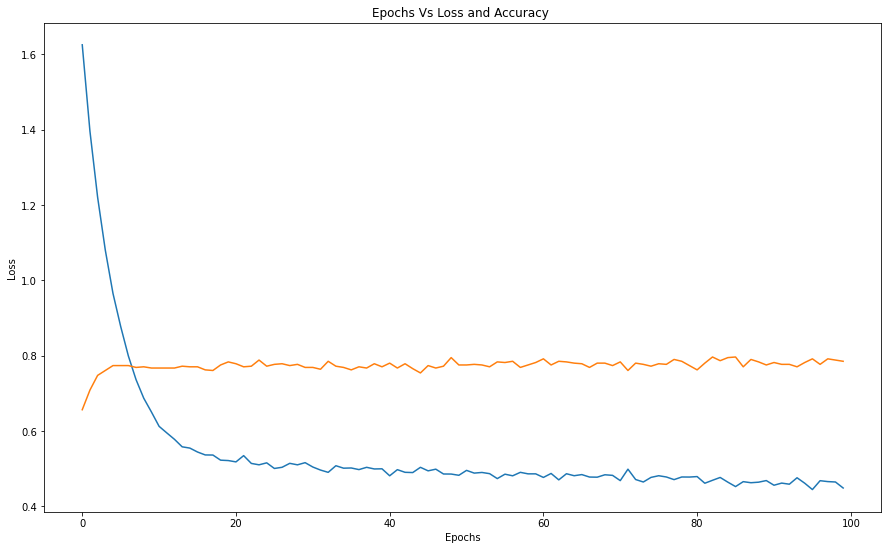

In [97]:
plt.figure(figsize=(15,9))
plt.plot(history.loss,label='Loss')
plt.plot(history.accuracy,label='Accuracy')
plt.title('Epochs Vs Loss and Accuracy ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [98]:
# As here we can see Accuracy is increasing and Loss is decreasing 